In [1]:
#### Steps:
##### 1.Preprocess the dataset by handling missing values and encoding categorical variables.
##### 2.Split the data into training and testing sets.
##### 3.Select a classification algorithm (e.g., logistic regression, random forest) and train it on the training data.
##### 4.Evaluate the model's performance using appropriate classification metrics (e.g., accuracy, precision, recall) on the testing data.
##### 5.Analyze the model's performance across different cuisines and identify any challenges or biases

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Preprocessed_Dataset.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(dataset.head())
dataset.info()

# Handle missing values by dropping rows with missing 'Cuisines'
dataset = dataset.dropna(subset=['Cuisines'])

# Label encode the 'Cuisines' column
label_encoder = LabelEncoder()
dataset['Cuisines'] = label_encoder.fit_transform(dataset['Cuisines'])

# Select relevant features for the classification task
# For simplicity, let's select a few features: 'Average Cost for two', 'Has Table booking (numerical)', 'Has Online delivery', 'Aggregate rating'
features = ['Average Cost for two', 'Has Table booking (numerical)', 'Has Online delivery', 'Aggregate rating']
X = dataset[features]

# Encode 'Has Online delivery' as it's a categorical feature
X = pd.get_dummies(X, columns=['Has Online delivery'], drop_first=True)

# Target variable
y = dataset['Cuisines']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

((7633, 4), (1909, 4), (7633,), (1909,))

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Get unique labels in y_test
unique_labels = np.unique(y_test)

# Generate the classification report with the correct labels
classification_rep = classification_report(y_test, y_pred, labels=unique_labels, target_names=label_encoder.inverse_transform(unique_labels), zero_division=1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.11471974855945521
Precision: 0.3725903626937659
Recall: 0.11471974855945521
F1 Score: 0.08573370577476964
Classification Report:
                                                                                          precision    recall  f1-score   support

                                                               Afghani, Mughlai, Chinese       1.00      0.00      0.00         1
                                                                                American       0.00      0.00      0.00         3
                                                                    American, BBQ, Steak       1.00      0.00      0.00         3
                                                                      American, Bar Food       1.00      0.00      0.00         1
                                                                     American, Breakfast       0.00      0.00      0.00         1
                                                              American, Breakf

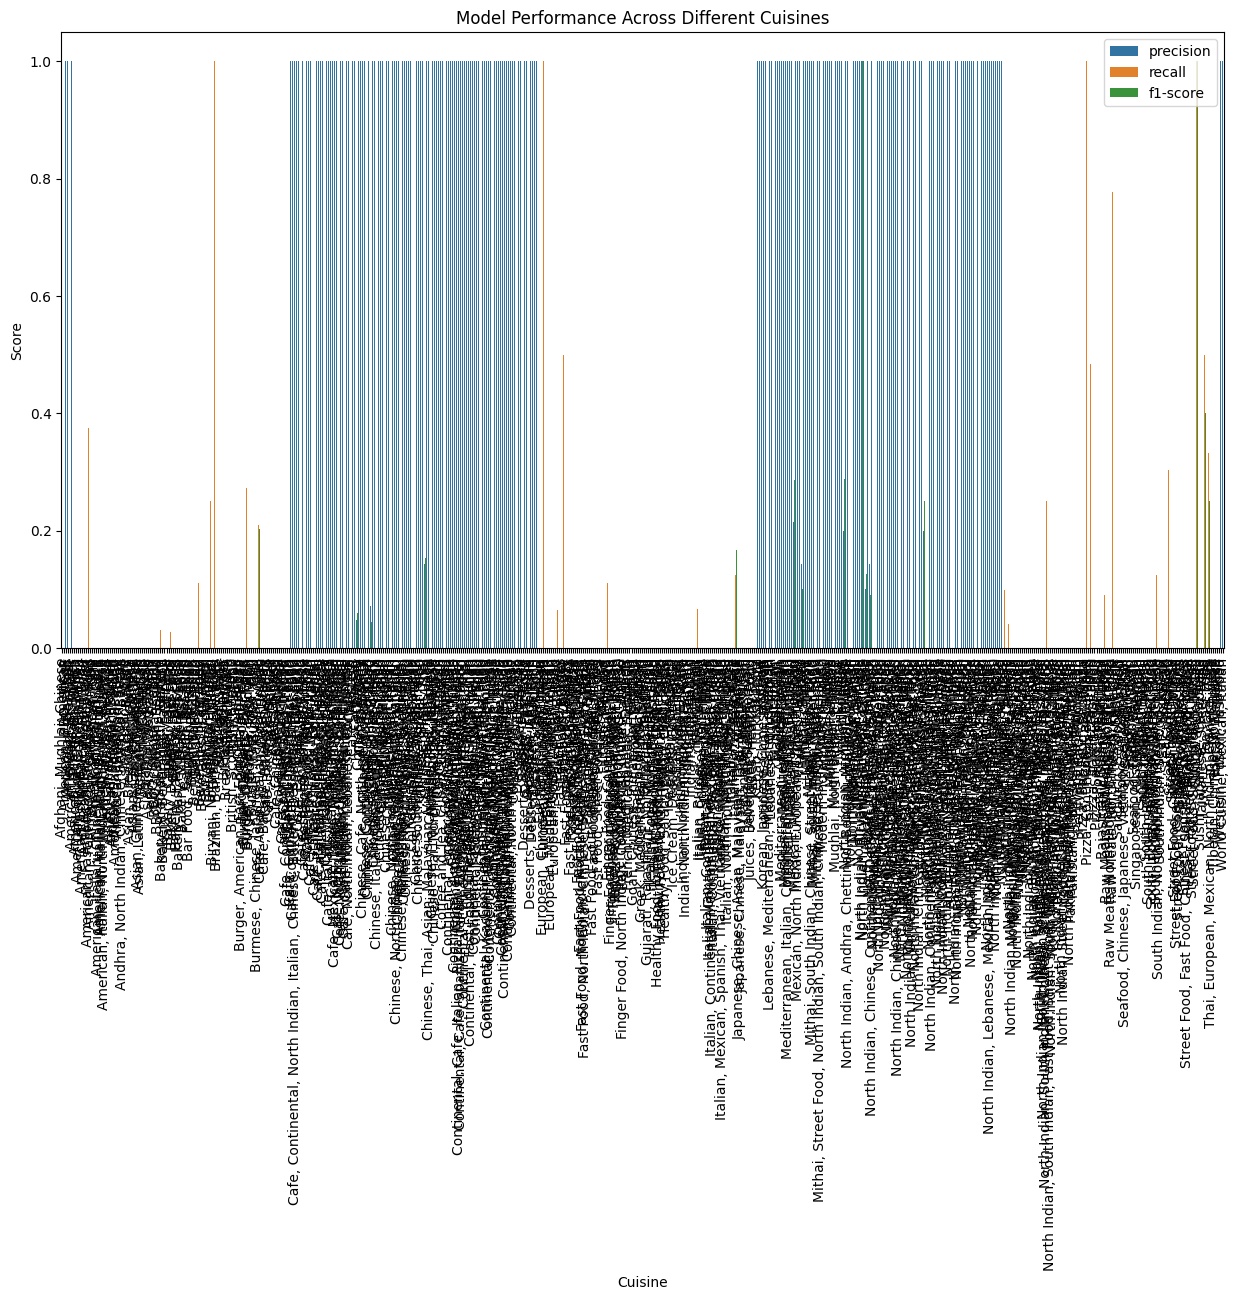

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get classification report as a dictionary
classification_report_dict = classification_report(y_test, y_pred, labels=unique_labels, target_names=label_encoder.inverse_transform(unique_labels), output_dict=True, zero_division=1)

# Convert the classification report to a DataFrame
classification_df = pd.DataFrame(classification_report_dict).transpose()

# Plot the precision, recall, and F1-score for each cuisine
plt.figure(figsize=(15, 8))
sns.barplot(data=classification_df.iloc[:-3, :-1].reset_index().melt(id_vars='index'), x='index', y='value', hue='variable')
plt.xticks(rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Score')
plt.title('Model Performance Across Different Cuisines')
plt.legend(loc='upper right')
plt.show()

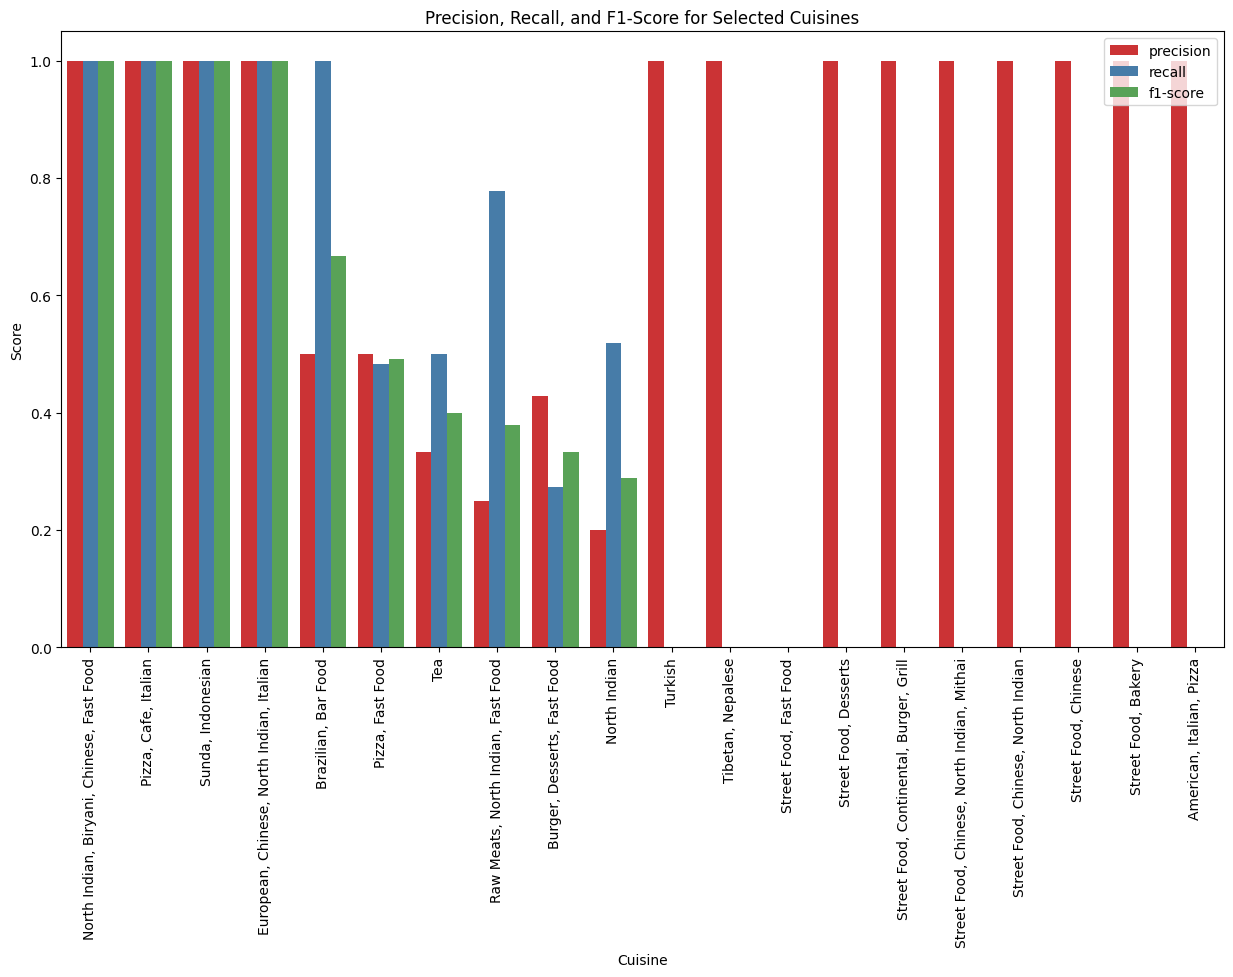

In [5]:
# Select top 10 and bottom 10 cuisines based on F1-score
top_cuisines = classification_df.sort_values(by='f1-score', ascending=False).head(10)
bottom_cuisines = classification_df.sort_values(by='f1-score', ascending=False).tail(10)

# Combine the top and bottom cuisines
selected_cuisines = pd.concat([top_cuisines, bottom_cuisines])

# Melt the DataFrame for easier plotting
melted_df = selected_cuisines.reset_index().melt(id_vars='index', value_vars=['precision', 'recall', 'f1-score'])

# Plot Precision, Recall, and F1-Score for Selected Cuisines
plt.figure(figsize=(15, 8))
sns.barplot(data=melted_df, x='index', y='value', hue='variable', palette="Set1")
plt.xticks(rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for Selected Cuisines')
plt.legend(loc='upper right')
plt.show()

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

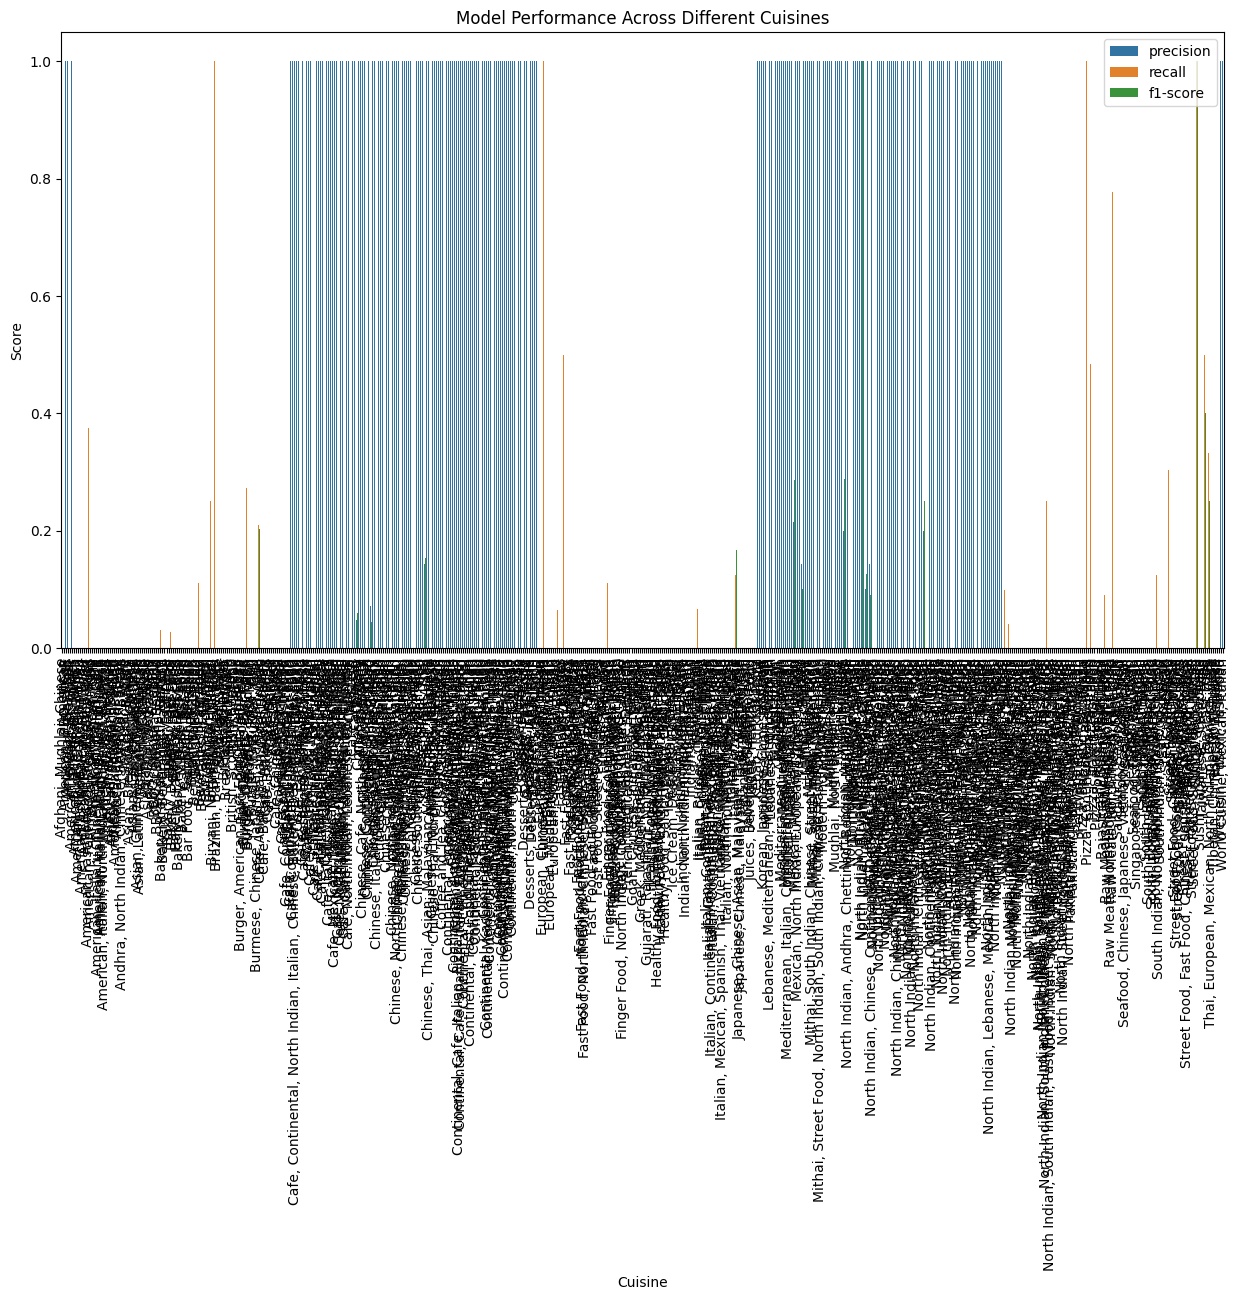

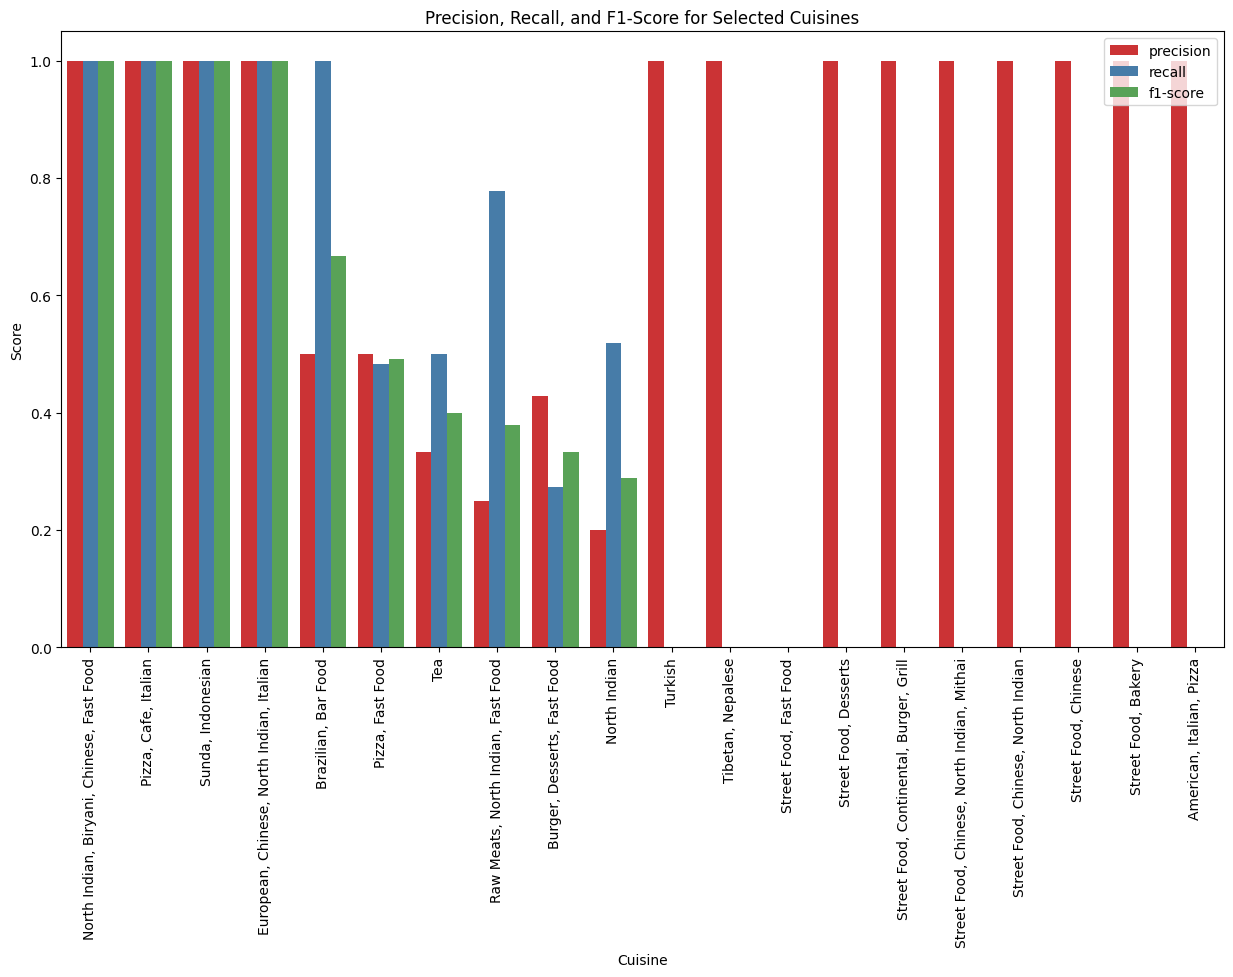

Enter the average cost for two:  1100
Enter 1 if the restaurant has table booking, otherwise 0:  1
Enter 1 if the restaurant has online delivery, otherwise 0:  0
Enter the aggregate rating:  3


The predicted cuisine for the restaurant based on your input is: Mughlai, Chinese, North Indian


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Preprocessed_Dataset.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(dataset.head())
dataset.info()

# Handle missing values by dropping rows with missing 'Cuisines'
dataset = dataset.dropna(subset=['Cuisines'])

# Label encode the 'Cuisines' column
label_encoder = LabelEncoder()
dataset['Cuisines'] = label_encoder.fit_transform(dataset['Cuisines'])

# Select relevant features for the classification task
# For simplicity, let's select a few features: 'Average Cost for two', 'Has Table booking (numerical)', 'Has Online delivery', 'Aggregate rating'
features = ['Average Cost for two', 'Has Table booking (numerical)', 'Has Online delivery', 'Aggregate rating']
X = dataset[features]

# Encode 'Has Online delivery' as it's a categorical feature
X = pd.get_dummies(X, columns=['Has Online delivery'], drop_first=True)

# Target variable
y = dataset['Cuisines']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Get unique labels in y_test
unique_labels = np.unique(y_test)

# Generate the classification report with the correct labels
classification_rep = classification_report(y_test, y_pred, labels=unique_labels, target_names=label_encoder.inverse_transform(unique_labels), zero_division=1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Classification Report:\n{classification_rep}")

# Get classification report as a dictionary
classification_report_dict = classification_report(y_test, y_pred, labels=unique_labels, target_names=label_encoder.inverse_transform(unique_labels), output_dict=True, zero_division=1)

# Convert the classification report to a DataFrame
classification_df = pd.DataFrame(classification_report_dict).transpose()

# Plot the precision, recall, and F1-score for each cuisine
plt.figure(figsize=(15, 8))
sns.barplot(data=classification_df.iloc[:-3, :-1].reset_index().melt(id_vars='index'), x='index', y='value', hue='variable')
plt.xticks(rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Score')
plt.title('Model Performance Across Different Cuisines')
plt.legend(loc='upper right')
plt.show()

# Select top 10 and bottom 10 cuisines based on F1-score
top_cuisines = classification_df.sort_values(by='f1-score', ascending=False).head(10)
bottom_cuisines = classification_df.sort_values(by='f1-score', ascending=False).tail(10)

# Combine the top and bottom cuisines
selected_cuisines = pd.concat([top_cuisines, bottom_cuisines])

# Melt the DataFrame for easier plotting
melted_df = selected_cuisines.reset_index().melt(id_vars='index', value_vars=['precision', 'recall', 'f1-score'])

# Plot Precision, Recall, and F1-Score for Selected Cuisines
plt.figure(figsize=(15, 8))
sns.barplot(data=melted_df, x='index', y='value', hue='variable', palette="Set1")
plt.xticks(rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for Selected Cuisines')
plt.legend(loc='upper right')
plt.show()

# Add code snippet to take user input and classify the restaurant
# Get user input for restaurant features
avg_cost = float(input("Enter the average cost for two: "))
table_booking = int(input("Enter 1 if the restaurant has table booking, otherwise 0: "))
online_delivery = int(input("Enter 1 if the restaurant has online delivery, otherwise 0: "))
aggregate_rating = float(input("Enter the aggregate rating: "))

# Create a DataFrame for the user input
user_input = pd.DataFrame({
    'Average Cost for two': [avg_cost],
    'Has Table booking (numerical)': [table_booking],
    'Aggregate rating': [aggregate_rating]
})

# One-hot encode 'Has Online delivery' and add it to the DataFrame
online_delivery_encoded = pd.get_dummies(pd.Series([online_delivery]), drop_first=True)
user_input = user_input.join(online_delivery_encoded)

# Ensure the columns match the training data
for col in X.columns:
    if col not in user_input.columns:
        user_input[col] = 0

# Predict the cuisine
predicted_cuisine_label = rf_classifier.predict(user_input)
predicted_cuisine = label_encoder.inverse_transform(predicted_cuisine_label)[0]

print(f"The predicted cuisine for the restaurant based on your input is: {predicted_cuisine}")

In [7]:
##### The above code predicted cuisine for the restaurant based on few factors such as 'average cost for two', 'has table booking', 'has online delivery', 'aggregate rating'

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the dataset
file_path = 'Preprocessed_Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic info of the dataset
print(data.head())
print(data.info())
print(data.describe())

# Drop irrelevant columns
columns_to_drop = [
    'Restaurant Name', 'Address', 'Locality Verbose', 'Longitude', 'Latitude',
    'Has Table booking', 'Has Online delivery', 'Is delivering now',
    'Switch to order menu', 'Rating color', 'Rating text'
]
data = data.drop(columns=columns_to_drop)

# Separate features and target variable
X = data.drop('Cuisines', axis=1)
y = data['Cuisines']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessors for numeric and categorical features
numeric_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors into a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_preprocessor, numeric_features),
    ('cat', categorical_preprocessor, categorical_features)
])

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline that combines preprocessing and modeling
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Classification Report:\n", report)

# Detailed Classification Report
report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
for cuisine, metrics in report_dict.items():
    if isinstance(metrics, dict):
        print(f"Cuisine: {cuisine}")
        print(f"  Precision: {metrics['precision']:.2f}")
        print(f"  Recall: {metrics['recall']:.2f}")
        print(f"  F1-Score: {metrics['f1-score']:.2f}")
        print()

# Confusion Matrix
conf_matrix = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))
print(conf_matrix)

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [9]:
#### This output for the above provides a comprehensive view of how well the model performs in classifying restaurant cuisines based on the given dataset

1.Accuracy: Overall correctness of the model's predictions.
2.Precision, Recall, F1-Score: Metrics for each class (cuisine) indicating how well the model performs in terms of precision (exactness), recall (completeness), and their harmonic mean (F1-score).
3.Classification Report: Detailed metrics for each class including precision, recall, and F1-score, as well as support (number of instances) for each class.
4.Cuisine Specific Metrics: Additional detailed metrics (precision, recall, F1-score) for each individual cuisine class.
5.Confusion Matrix: Table showing the counts of true positive, false positive, true negative, and false negative predictions for each class, helping to diagnose the performance of the classification model.

Here our's task 3 completes